In [1]:
import pandas as pd

data = pd.read_csv('updated_pollution_dataset.csv')
data.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


data exploration and visualization

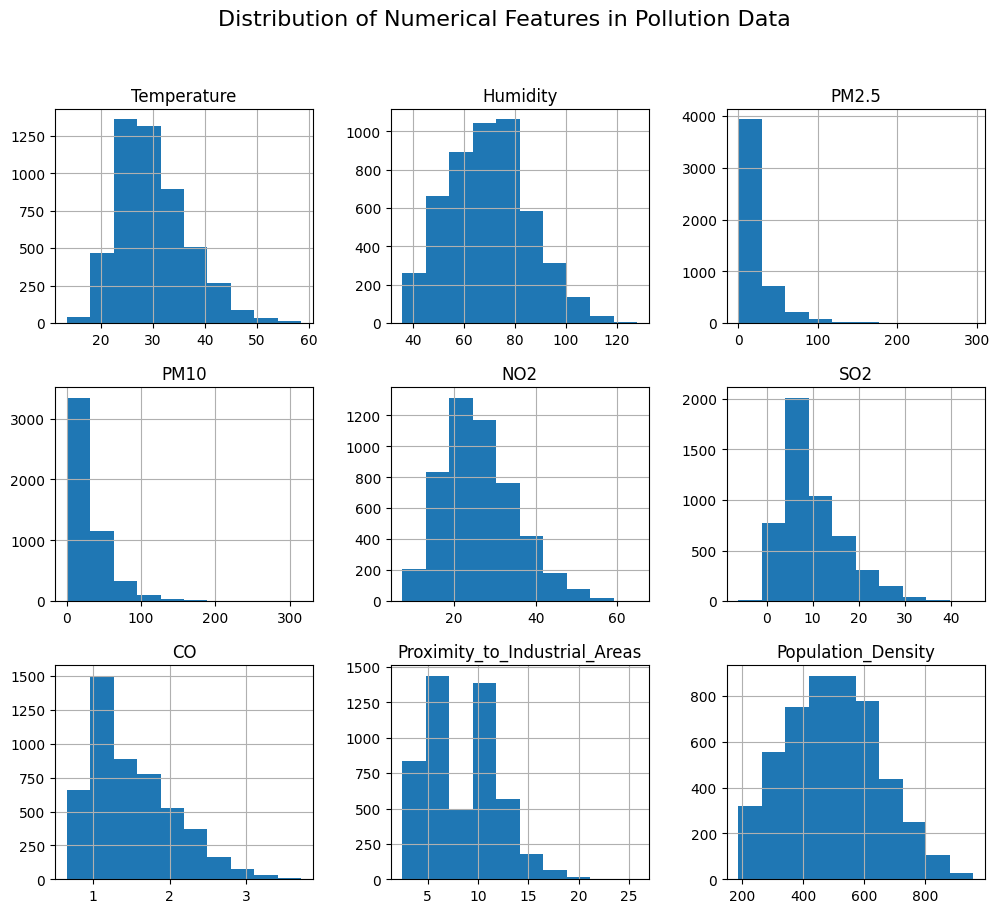

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
data.hist(figsize=(12, 10))
plt.suptitle('Distribution of Numerical Features in Pollution Data', fontsize=16)
plt.show()

preprocessing

In [4]:
print("\nAir Quality Dataset - Missing Values:")
print(data.isnull().sum())




Air Quality Dataset - Missing Values:
Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


In [5]:
print("\nAir Quality Dataset - Data Types:")
print(data.dtypes)


Air Quality Dataset - Data Types:
Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density                 int64
Air Quality                       object
dtype: object


In [6]:
print("\nAir Quality - Unique Values in 'Air Quality' column:")
print(data['Air Quality'].unique())


Air Quality - Unique Values in 'Air Quality' column:
['Moderate' 'Good' 'Hazardous' 'Poor']


air quality one-hot encoding for 'Air Quality'

In [7]:
data = pd.get_dummies(data, columns=['Air Quality'], drop_first=True)


In [8]:

print("\nProcessed Air Quality Dataset Head:")
print(data.head())


Processed Air Quality Dataset Head:
   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density  Air Quality_Hazardous  \
0                            6.3                 319                  False   
1                            6.0                 611                  False   
2                            5.2                 619                  False   
3                           11.1                 551                  False   
4                           12.7                 303                  False   

   Air Quality_Moderate  Air Quality_Poor  
0                  True             False  
1                  True             False  
2

splitting

In [9]:
from sklearn.model_selection import train_test_split

# Features and target for Air Quality
X = data.drop(['Air Quality_Hazardous', 'Air Quality_Moderate', 'Air Quality_Poor'], axis=1) # Adjusted after One-Hot Encoding
y_categorical = data[['Air Quality_Hazardous', 'Air Quality_Moderate', 'Air Quality_Poor']] # Multiclass target
y = data[['Air Quality_Hazardous', 'Air Quality_Moderate', 'Air Quality_Poor']].idxmax(axis=1).astype('category').cat.codes # Numerical target

# Split into train-test sets for Air Quality
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y) # Added stratify for better class balance

print("\nAir Quality Data - Training and Test sets created.")


Air Quality Data - Training and Test sets created.


In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Gradient Boosting Classifier for Air Quality
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)

# Predict and Evaluate for Air Quality
y_pred = gb_clf.predict(X_test)
print("\nGradient Boosting Classifier - Air Quality:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Gradient Boosting Classifier - Air Quality:
Accuracy: 0.958
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       500
           1       0.96      0.97      0.96       300
           2       0.90      0.91      0.90       200

    accuracy                           0.96      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.96      0.96      0.96      1000



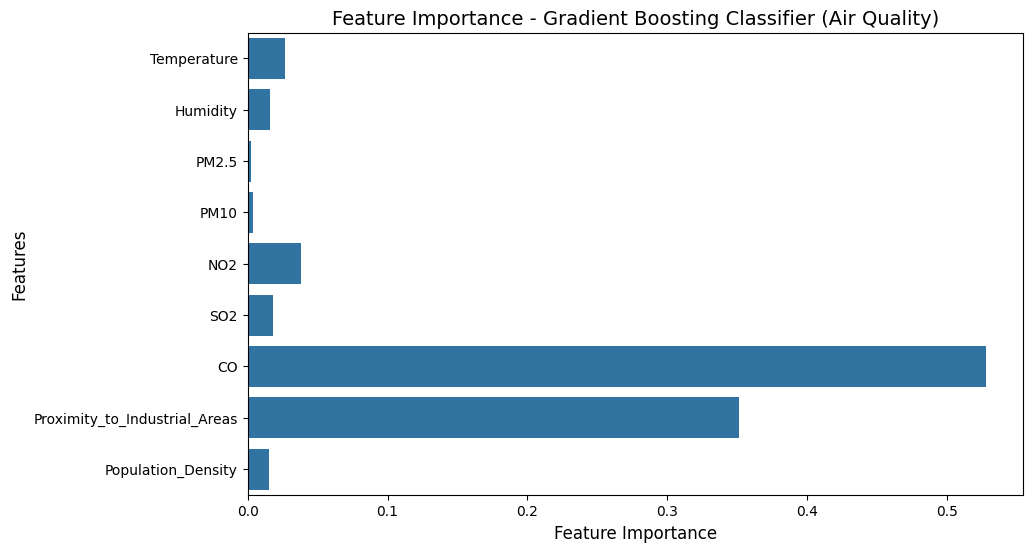

In [13]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=gb_clf.feature_importances_, y=X.columns)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title("Feature Importance - Gradient Boosting Classifier (Air Quality)", fontsize=14)
plt.show()

In [14]:
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost Classifier for Air Quality
ada_clf_pollution = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42) # Adjusted learning_rate
ada_clf_pollution.fit(X_train, y_train)

# Predict and Evaluate for Air Quality
y_pred_pollution_ada = ada_clf_pollution.predict(X_test)
print("\nAdaBoost Classifier - Air Quality:")
print("Accuracy:", accuracy_score(y_test, y_pred_pollution_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_pollution_ada))



AdaBoost Classifier - Air Quality:
Accuracy: 0.896
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92       500
           1       0.91      0.96      0.94       300
           2       0.73      0.86      0.79       200

    accuracy                           0.90      1000
   macro avg       0.87      0.90      0.88      1000
weighted avg       0.91      0.90      0.90      1000



In [15]:
import xgboost as xgb

# Train XGBoost Classifier for Air Quality
xgb_clf_pollution = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='mlogloss') # Added eval_metric
xgb_clf_pollution.fit(X_train, y_train)

# Predict and Evaluate for Air Quality
y_pred_pollution_xgb = xgb_clf_pollution.predict(X_test)
print("\nXGBoost Classifier - Air Quality:")
print("Accuracy:", accuracy_score(y_test, y_pred_pollution_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_pollution_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:28:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Classifier - Air Quality:
Accuracy: 0.962
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       500
           1       0.96      0.97      0.97       300
           2       0.91      0.90      0.91       200

    accuracy                           0.96      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.96      0.96      0.96      1000



In [16]:
import lightgbm as lgb

# Train LightGBM Classifier for Air Quality
lgbm_clf_pollution = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgbm_clf_pollution.fit(X_train, y_train)

# Predict and Evaluate for Air Quality
y_pred_pollution_lgbm = lgbm_clf_pollution.predict(X_test)
print("\nLightGBM Classifier - Air Quality:")
print("Accuracy:", accuracy_score(y_test, y_pred_pollution_lgbm))
print("Classification Report:\n", classification_report(y_test, y_pred_pollution_lgbm))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2183
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 9
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Start training from score -1.203973
[LightGBM] [Info] Start training from score -1.609438

LightGBM Classifier - Air Quality:
Accuracy: 0.964
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       500
           1       0.96      0.97      0.97       300
           2       0.91      0.91      0.91       200

    accuracy                           0.96      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.96      0.96      0.96      1000



In [17]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


estimators_clf_pollution = [
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)), # Reduced estimators for stacking
    ('ada', AdaBoostClassifier(n_estimators=50, random_state=42)),       # Reduced estimators for stacking
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),    # Reduced estimators for stacking
    ('lgbm', lgb.LGBMClassifier(n_estimators=50, random_state=42)),      # Reduced estimators for stacking
    ('xgb', xgb.XGBClassifier(n_estimators=50, random_state=42, use_label_encoder=False, eval_metric='mlogloss')) # Reduced estimators for stacking
]

# Define meta-classifier
meta_classifier_pollution = LogisticRegression(random_state=42, solver='liblinear') # Simpler meta-classifier

# Initialize Stacking Classifier
stack_clf_pollution = StackingClassifier(estimators=estimators_clf_pollution, final_estimator=meta_classifier_pollution)
stack_clf_pollution.fit(X_train, y_train)

# Predict and Evaluate for Air Quality
y_pred_pollution_stack = stack_clf_pollution.predict(X_test)
print("\nStacking Classifier - Air Quality:")
print("Accuracy:", accuracy_score(y_test, y_pred_pollution_stack))
print("Classification Report:\n", classification_report(y_test, y_pred_pollution_stack))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2183
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 9
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Start training from score -1.203973
[LightGBM] [Info] Start training from score -1.609438


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:32:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2158
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 9
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Start training from score -1.203973
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2158
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 9
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Start training from score -1.203973
[LightGBM] [Info] Start trai

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:32:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:32:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:32:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:32:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:32:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Stacking Classifier - Air Quality:
Accuracy: 0.957
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       500
           1       0.96      0.97      0.97       300
           2       0.90      0.89      0.89       200

    accuracy                           0.96      1000
   macro avg       0.95      0.94      0.95      1000
weighted avg       0.96      0.96      0.96      1000



In [18]:
from sklearn.model_selection import GridSearchCV

# Example for Gradient Boosting Classifier
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_search = GridSearchCV(gb_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best hyperparameters for Gradient Boosting Classifier: {best_params}")

Best hyperparameters for Gradient Boosting Classifier: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}


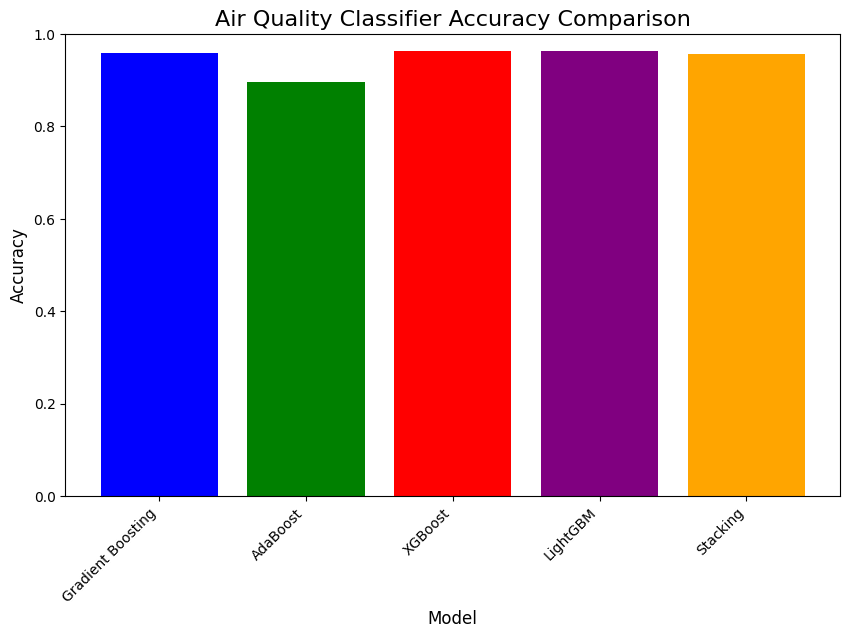

In [19]:
models = ['Gradient Boosting', 'AdaBoost', 'XGBoost', 'LightGBM', 'Stacking']
accuracies = [accuracy_score(y_test, y_pred),
              accuracy_score(y_test, y_pred_pollution_ada),
              accuracy_score(y_test, y_pred_pollution_xgb),
              accuracy_score(y_test, y_pred_pollution_lgbm),
              accuracy_score(y_test, y_pred_pollution_stack)]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Air Quality Classifier Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1.0)  # Set y-axis limit for accuracy
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()
